In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = sns.load_dataset('tips')

In [35]:
#explore data set
display(df.shape,df.tail(),df.head(),df.columns,df.info(),df.describe().T)
display(df.isna().sum(),df.nunique())
display(df.day.unique(),df.time.unique(),df['size'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


(244, 7)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

None

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

array([2, 3, 4, 1, 6, 5], dtype=int64)

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

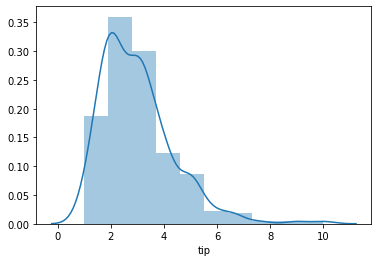

In [31]:
display(df.tip)
sns.distplot(df['tip'], kde=True, bins=10)


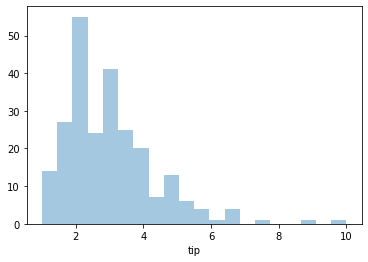

In [32]:
sns.distplot(df['tip'], kde=False, bins=20)

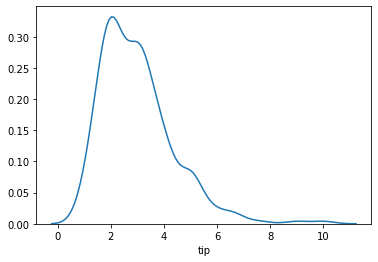

In [34]:
sns.distplot(df['tip'],hist=False, bins=10);

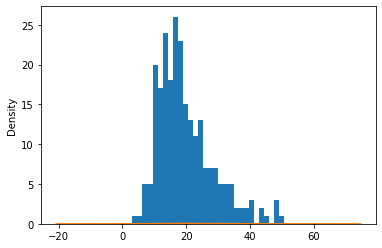

In [41]:
df.total_bill.plot.hist(bins=30)

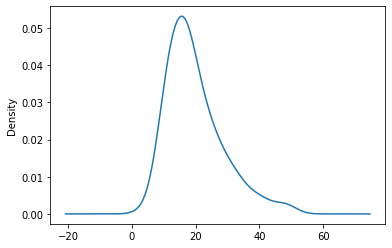

In [42]:
df.total_bill.plot.kde()

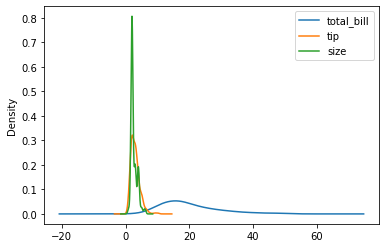

In [44]:
df.plot.kde()

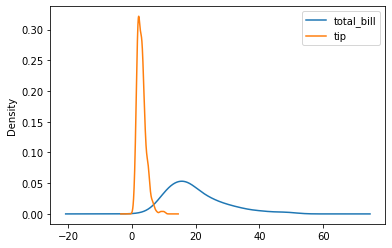

In [47]:
df[['total_bill','tip']].plot.kde()

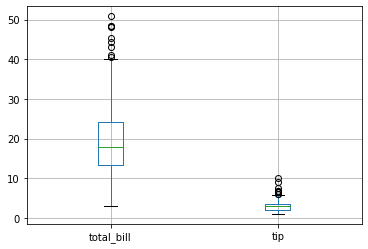

In [50]:
df[['total_bill','tip']].plot.box(grid=True)

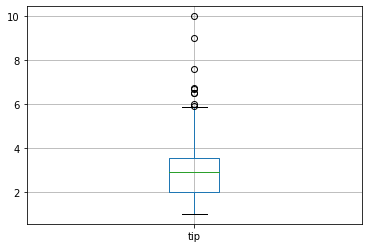

In [51]:
df['tip'].plot.box(grid=True)

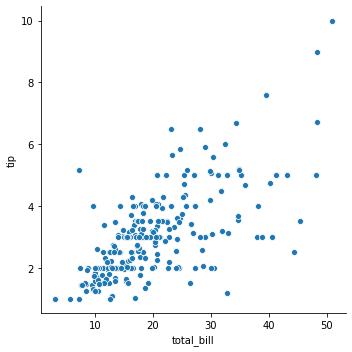

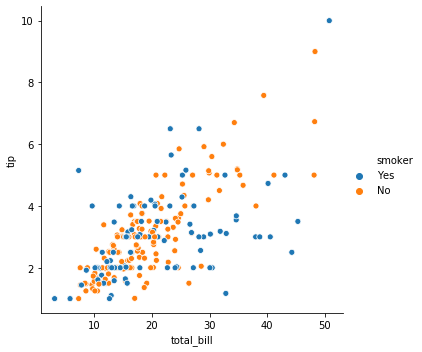

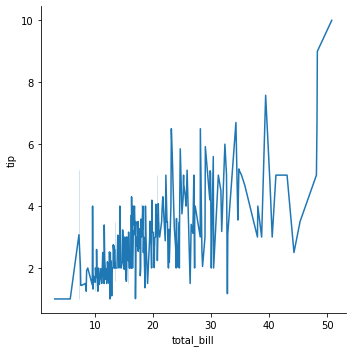

In [56]:
sns.relplot(x="total_bill", y="tip", data=df);
sns.relplot(x="total_bill", y="tip", hue="smoker", data=df)


#This plot is similar to the scatterplot but instead of dots, 
#it displays the line joining all the dots by arranging the variable value
#represented on the x-axis.
sns.relplot(x="total_bill", y="tip", kind="line", data=df)

In [58]:
#corr
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


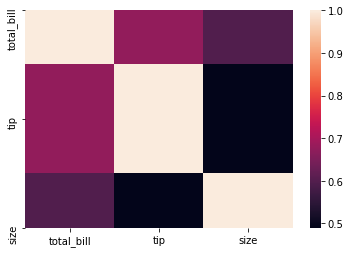

In [60]:
sns.heatmap(df.corr())

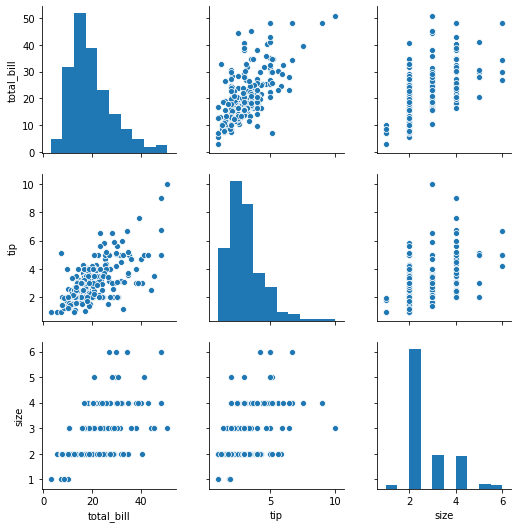

In [57]:
#sns.pairplot
sns.pairplot(df)

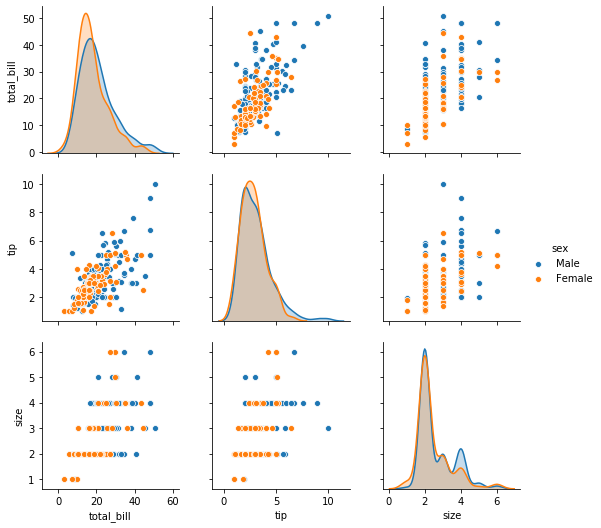

In [62]:
sns.pairplot(df,hue = 'sex');

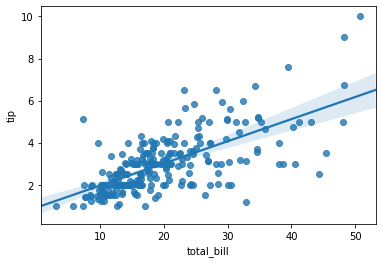

In [66]:
sns.regplot(df.total_bill,df.tip);

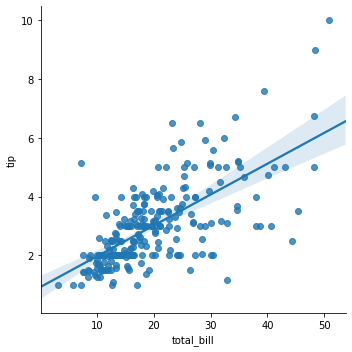

In [69]:
sns.lmplot('total_bill','tip',df);

Male      157
Female     87
Name: sex, dtype: int64


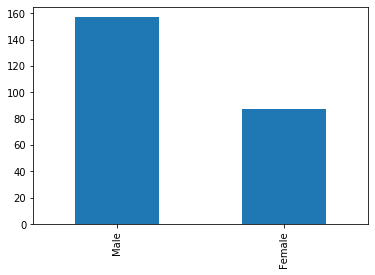

In [74]:
#value_counts()
print(df.sex.value_counts())
df.sex.value_counts().plot(kind="bar")

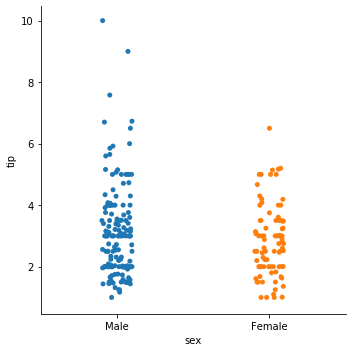

In [76]:
#We can see that most of the tips are concentrated between 2 and 4
#irrespective of the gender.
sns.catplot(x="sex", y="tip", data=df);

## basic group by

In [77]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


3.102670454545454

2.7280882352941176

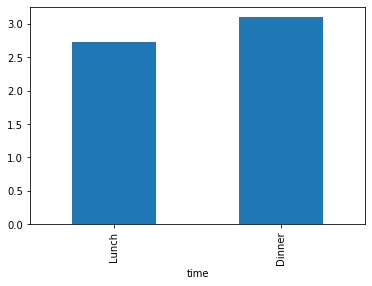

In [91]:
display(df[df.time=='Dinner']['tip'].mean(),
        df[df.time=='Lunch']['tip'].mean())


df.groupby('time').tip.mean().plot.bar()

In [93]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [94]:
df['prec'] = df.tip / df.total_bill

In [95]:
df

,total_bill,tip,sex,smoker,day,time,size,prec
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


TypeError: annotate() missing 1 required positional argument: 'xy'

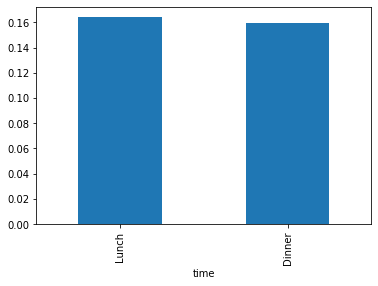

In [111]:
df2 = df.groupby('time').prec.mean()
df2

ax = df.groupby('time').prec.mean().plot.bar()
ax.annotate("ddd","sss")
#for idx, label in enumerate(list(df.index)): 
 #       for acc in df.columns:
#          value = df.iloc[idx][acc]
#            ax.annotate(value,(idx, value),xytext=(0, 15), 
#                        textcoords='offset points')